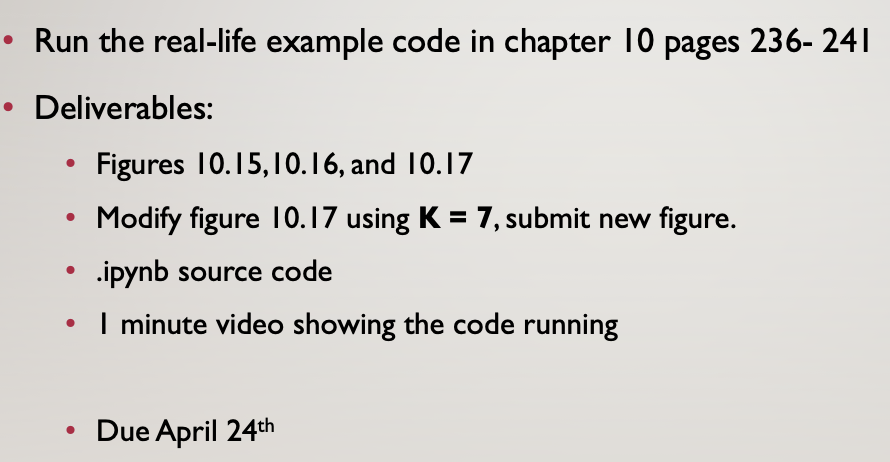

## Marcos Hernandez
### Using K-Means to Solve Real-Life Problems

### Real world use case:


#### Problem:
A clothing designer would like to design some new shorts. An important design problem would be to come up with the series of sizes that can fit most people. Essentially a  series of sizes of people with different:
* Waist Circumference
* Upper Leg Length

You need to find the right combination of sizes.

#### Solution:
The K-Means algorithm can be used to solve this problem. 

* Obtain a dataset containing measurements of a group of people (of certain age range).
* Apply the K-Means algorithm to group these people into clusters based on specific measurement of their body parts.
* Once the cluster are found, they can be used to get a clear picture of the sizes that need to be designed.

#### Dataset:
The dataset has 27 columns and 9338 rows. We will focus on two of them:
* BMXWAIST: Waist Circumference(cm)
* BMXLEG: Upper Leg Length(cm)

The dataset is sived in the BMX_G.csv file


In [10]:
# Data

import numpy as np
import pandas as pd

df = pd.read_csv("BMX_G.csv")

print(df.shape) # (9338, 27)


(9338, 27)


#### Data Cleaning

Dataset may contains significant missing values:
* check for missing values

In [ ]:
df.isnull().sum() # There are many missing values

# But we are only interseted in these two:

# #------------------------#
# |  Column  | Missing vals|
# |------------------------|
# |bmxleg    |        2383 |
# |bmx_waist |        1134 |

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [20]:
#Removing missing values

df = df.dropna(subset = ["bmxleg","bmxwaist"]) # remove rows with NaNs
print(df.shape) #(6899, 27)

#Note: Null data records for specified colimns have been removed,
#  form the original 9338 records, there are now only 6899 records.

(6899, 27)


#### Plotting dataset

Text(0, 0.5, 'Waist Circumference (cm)')

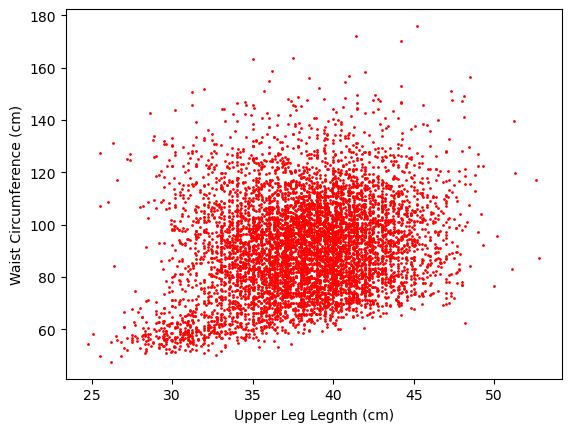

In [ ]:
#importing pyplot
import matplotlib.pyplot as plt

#Scatter plot
plt.scatter(df['bmxleg'], df['bmxwaist'], c = "r", s = 1)

#Setting Plot Labels
plt.xlabel("Upper Leg Legnth (cm)")
plt.ylabel("Waist Circumference (cm)")

The scatterplot showing the distribution of waist circumference and upper leg length.

#### Clustering using K-Means
Assuming we are to create two sizes of shorts, in this case meaning that we'd like to cluster the the points in two clusters; that is, k=2. 
* Using scikit-learn's KMeans model to perform this clustering

/Users/marcogod/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Two Clusters')

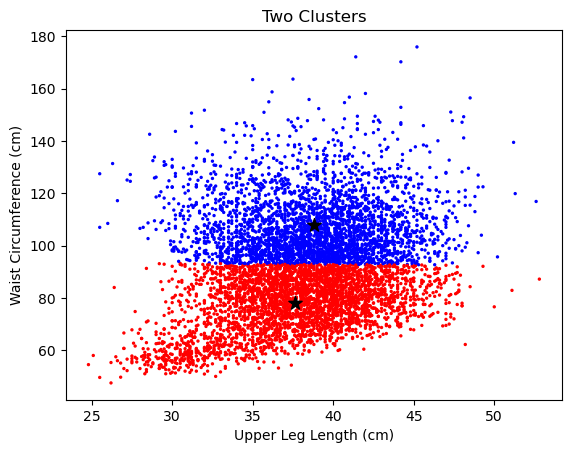

In [37]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans

k = 2
x = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]

plt.scatter(df['bmxleg'],df['bmxwaist'], c= colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')
plt.xlabel("Upper Leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")
plt.title("Two Clusters")


Clustering the points into two clusters, the main focus is in the two clusters denoted as black stars.

In [ ]:
# Centroids in a list comprehension
c = [print(f"Centroid {i+1}:", centroid) for i,centroid in enumerate(centroids)]
print(c)

Centroid 1: [ 38.82445483 107.96137072]
Centroid 2: [37.6544592  77.88026565]
[None, None]
